# Extended Phase Graphs Tutorial

Extended phase graphs (EPGs) are a powerful tool for MRI signal analysis.  Put simply, the EPG formalism (1) is a Fourier representation of transverse and longitudinal magnetization within a voxel and (2) EPG coefficients can very efficiently be propagated through common sequence operations (nutation, relaxation, gradients and diffusion) to easily and accurately simulate many common MRI pulse sequences.

## Setup
Our functions are in mrsigpy.py, so we will import that.

In [1]:
import numpy as np
import mrsigpy as mrs

N = 31
Ns = 1.
frac = 0.

FpFmZ = np.array([[1.,0.],[1.,0.],[1.,0.]])

spins = mrs.epg_FZ2spins(FpFmZ,N,.999)
print("Spins is %s" % spins)





Spins is [[-0.99455715 -0.95328595 -0.87306487 -0.75717161 -0.61034141 -0.43857355
  -0.2488862  -0.04902972  0.15283005  0.3484454   0.52982377  0.68955431
   0.82111065  0.91911759  0.97957072  1.          0.97957072  0.91911759
   0.82111065  0.68955431  0.52982377  0.3484454   0.15283005 -0.04902972
  -0.2488862  -0.43857355 -0.61034141 -0.75717161 -0.87306487 -0.95328595
  -0.99455715]
 [-0.1041925  -0.30206935 -0.48760408 -0.65321601 -0.79213847 -0.8986953
  -0.96853274 -0.99879732 -0.98825249 -0.93732908 -0.84810776 -0.72423398
  -0.57076904 -0.39398331 -0.20109998  0.          0.20109998  0.39398331
   0.57076904  0.72423398  0.84810776  0.93732908  0.98825249  0.99879732
   0.96853274  0.8986953   0.79213847  0.65321601  0.48760408  0.30206935
   0.1041925 ]
 [-0.99455715 -0.95328595 -0.87306487 -0.75717161 -0.61034141 -0.43857355
  -0.2488862  -0.04902972  0.15283005  0.3484454   0.52982377  0.68955431
   0.82111065  0.91911759  0.97957072  1.          0.97957072  0.91911759


<Figure size 432x288 with 0 Axes>

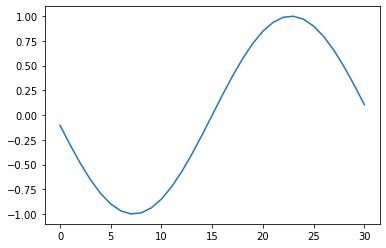

<Figure size 432x288 with 0 Axes>

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(spins[1,:])
plt.figure()

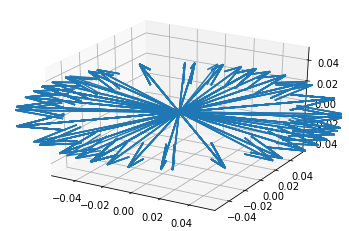

In [3]:
mrs._3dspins()

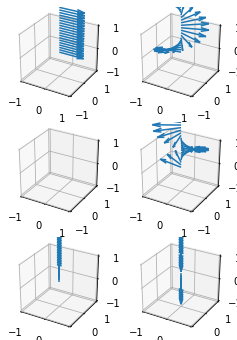

In [4]:
FZ = np.array([[0.5,0.5],[0.5,0.3],[0.2,0.2]])

mrs.epg_show(FZ,19)


## EPG Definition
The EPG basis consists of coefficients $F_n$ and $Z_n$, to represent transverse and longitudinal magnetization, respectively.  There are different conventions for these, but we use $F_n$ where $n$ is any integer and $Z_n$ where $n \ge 0$.  

The subscript n refers to the number of cycles of dephasing, assumed to be an integer.  The transverse magnetization is expressed as $m_{xy} = m_x + i*m_y$, and longitudinal magnetization is $m_z$.  Then we write a real-valued vector $M = [m_{xy} m^\ast_{xy} m_z]^T$.

Now if we consider a variable $z$ which is the position within the voxel, we can express $m$ using a Fourier basis:

$$m_{xy}(z) = \sum_{n=-\infty}^{\infty} F_n e^{2\pi i z}$$

This shows that $m_{xy}(z)$ is written using basis functions that are just twists ($e^{2\pi i z}$) and the basis coefficients are $F_n$.  This is just an inverse Fourier transform!

$m_z$ is a bit trickier to see from the inverse Fourier transform, since it is real-valued, but looks like this:

$$m_z(z) = \Re \{ \sum_{n=0}^{\infty} Z_n e^{2\pi i z} \}$$


## RF Rotations
The default for `epg_rf()` here is a simple $90_y$ degree excitation, which moves magnetization from $m_z$ to $m_x$, but the flip angle and phase (both in radians) can also be passed.

In [5]:
FZ = np.array([[0],[0],[1]])    # Equilibrium magnetization, along m_z
print(FZ)
FZ = mrs.epg_rf(FZ)             # 90 rotation along m_y
print("\nRotate from equilibrium about m_y to m_x:\n", FZ)
FZ = mrs.epg_rf(alpha=90.,phi=0.)
print("\nRotate from equilibrium about m_x to m_y  (The F_0 is imaginary):\n", FZ)
FZ = mrs.epg_rf(FZ,67.,90.)
print("\nRotating m_y around m_y does nothing:\n", FZ)

[[0]
 [0]
 [1]]

Rotate from equilibrium about m_y to m_x:
 [[1.000000e+00-6.123234e-17j]
 [1.000000e+00+6.123234e-17j]
 [6.123234e-17+0.000000e+00j]]

Rotate from equilibrium about m_x to m_y  (The F_0 is imaginary):
 [[0.000000e+00-1.j]
 [0.000000e+00+1.j]
 [6.123234e-17+0.j]]

Rotating m_y around m_y does nothing:
 [[ 1.90577075e-17-1.j]
 [ 1.90577075e-17+1.j]
 [-3.24392848e-17+0.j]]


## Gradients
Gradients simply move the $F_n$ coefficients around.  

In [6]:
FZ = mrs.epg_grad(FZ)      # FZ was excited by the RF
print("Now we have 1 cycle of dephasing:\n",FZ)
FZ = mrs.epg_grad(FZ)
print("Now we have 2 cycles of dephasing:\n",FZ)
FZ = mrs.epg_grad(FZ,noadd=True,positive = False)   # Negative gradient!
print("We refocused back to 1 cycle of dephasing:\n",FZ)

Now we have 1 cycle of dephasing:
 [[ 0.00000000e+00-0.j  1.90577075e-17-1.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j]
 [-3.24392848e-17+0.j  0.00000000e+00+0.j]]
Now we have 2 cycles of dephasing:
 [[ 0.00000000e+00-0.j  0.00000000e+00-0.j  1.90577075e-17-1.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [-3.24392848e-17+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]]
We refocused back to 1 cycle of dephasing:
 [[ 0.00000000e+00-0.j  1.90577075e-17-1.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [-3.24392848e-17+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]]


## EPG to Spins:  Fourier Transform
We can easily convert between the EPG representation and to $M = [m_x m_y m_z]^T$ or "spins" using a Fourier transform (with a bit of rearranging).  Note that the number of spins in a voxel should be at least as high as the number of non-zero states ($n$).  The $M$ returned is an array of spins at different $z$ locations.  Again remember $z$ is just "across" a voxel, so quite arbitary.

In [7]:
FZ = np.array([[1],[1],[0]])
M = mrs.epg_FZ2spins(FZ,9)
print("M for all magnetization along m_x:\n",M)
M = mrs.epg_FZ2spins(epg_grad(FZ),9)
print("M for one dephased cycle:\n",M)




M for all magnetization along m_x:
 [[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


NameError: name 'epg_grad' is not defined